In [67]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import defaultdict,Counter

In [14]:
file_list =os.listdir('./513_distribute')

In [ ]:
data = []
for protein_index  in range(len(file_list )):
    with open('./513_distribute/'+file_list[protein_index], 'r') as protein_data:
        lines = protein_data .readlines()

    res = None
    stride = None    

    for line in lines:
        if line.startswith("RES"):
            res = line.strip().split(":", 1)[1].strip()
        elif line.startswith("STRIDE"):
            stride = line.strip().split(":", 1)[1].strip()
            if res and stride:
                data.append({
                    'RES': res,
                    'STRIDE': stride
                })
                res = None
                stride = None
    
# print(len(data[5]['RES']))
# print(data[0])

134
{'RES': 'R,T,D,C,Y,G,N,V,N,R,I,D,T,T,G,A,S,C,K,T,A,K,P,E,G,L,S,Y,C,G,V,S,A,S,K,K,I,A,E,R,D,L,Q,A,M,D,R,Y,K,T,I,I,K,K,V,G,E,K,L,C,V,E,P,A,V,I,A,G,I,I,S,R,E,S,H,A,G,K,V,L,K,N,G,W,G,D,R,G,N,G,F,G,L,M,Q,V,D,K,R,S,H,K,P,Q,G,T,W,N,G,E,V,H,I,T,Q,G,T,T,I,L,I,N,F,I,K,T,I,Q,K,K,F,P,S,W,T,K,D,Q,Q,L,K,G,G,I,S,A,Y,N,A,G,A,G,N,V,R,S,Y,A,R,M,D,I,G,T,T,H,D,D,Y,A,N,D,V,V,A,R,A,Q,Y,Y,K,Q,H,G,Y,', 'STRIDE': 'C,C,T,T,T,T,C,G,G,G,C,C,C,C,C,B,C,H,H,H,H,G,G,G,C,C,C,C,C,B,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,C,C,C,H,H,H,H,H,H,H,H,H,H,H,H,G,G,G,T,T,T,B,T,T,B,T,T,T,T,C,E,E,T,T,T,T,E,E,T,T,T,T,C,C,C,C,T,T,T,T,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,T,T,T,T,C,H,H,H,H,H,H,H,H,H,H,H,H,H,H,C,G,G,G,C,C,T,T,T,T,T,T,T,T,T,T,T,T,T,H,H,H,H,H,H,H,H,H,H,H,H,H,H,C,C,C,'}


In [73]:
protein_lengths = [len(entry['RES'].split(',')) if entry['RES'] else 0 for entry in data]
all_residues = []
all_stride=[]
for entry in data:
    residues = [r.strip() for r in entry['RES'].split(',') if r.strip()]
    strides=[r.strip() for r in entry['STRIDE'].split(',') if r.strip()]
    all_residues.extend(residues)
    all_stride.extend(strides)
residue_counts = Counter(all_residues)
stride_counts = Counter(all_stride)

residues = sorted(residue_counts.keys())  
counts = [residue_counts[r] for r in residues]  
strides = sorted(stride_counts.keys())  
count_strides = [stride_counts[r] for r in strides] 

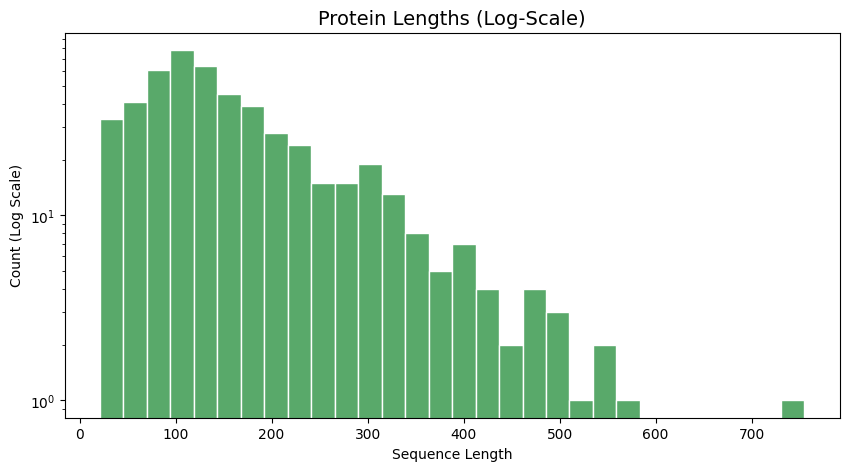

In [65]:
plt.figure(figsize=(10, 5))
plt.hist(protein_lengths, bins=30, color='#59A96A', log=True, edgecolor='white')
plt.title("Protein Lengths (Log-Scale)", fontsize=14)
plt.xlabel("Sequence Length")
plt.ylabel("Count (Log Scale)")
plt.show()

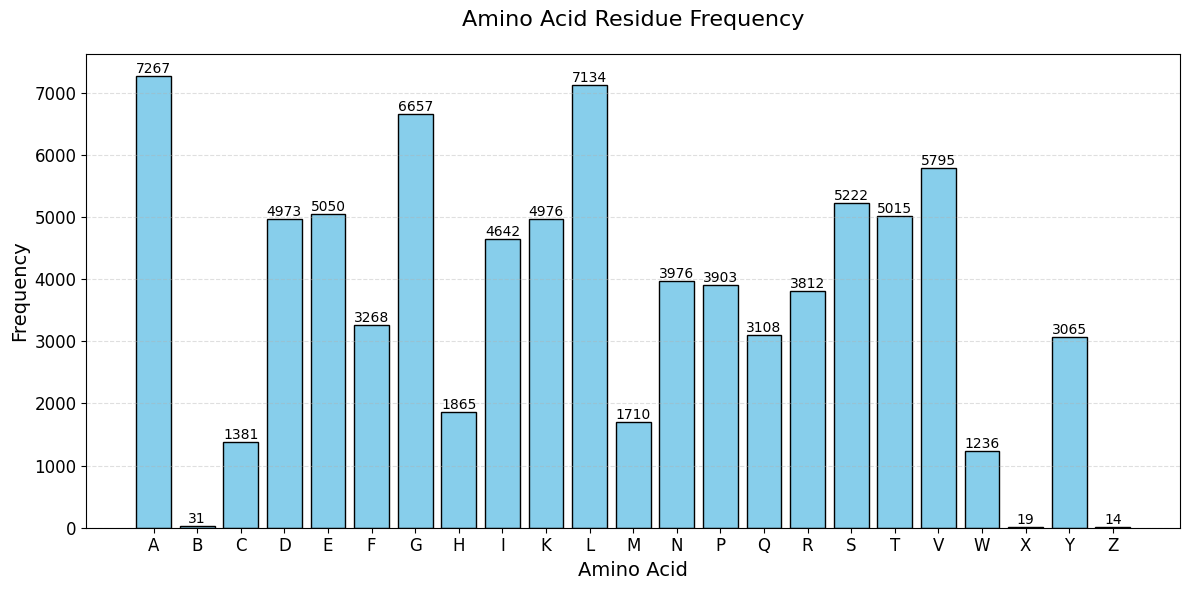

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(residues, counts, color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Amino Acid Residue Frequency', fontsize=16, pad=20)
plt.xlabel('Amino Acid', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

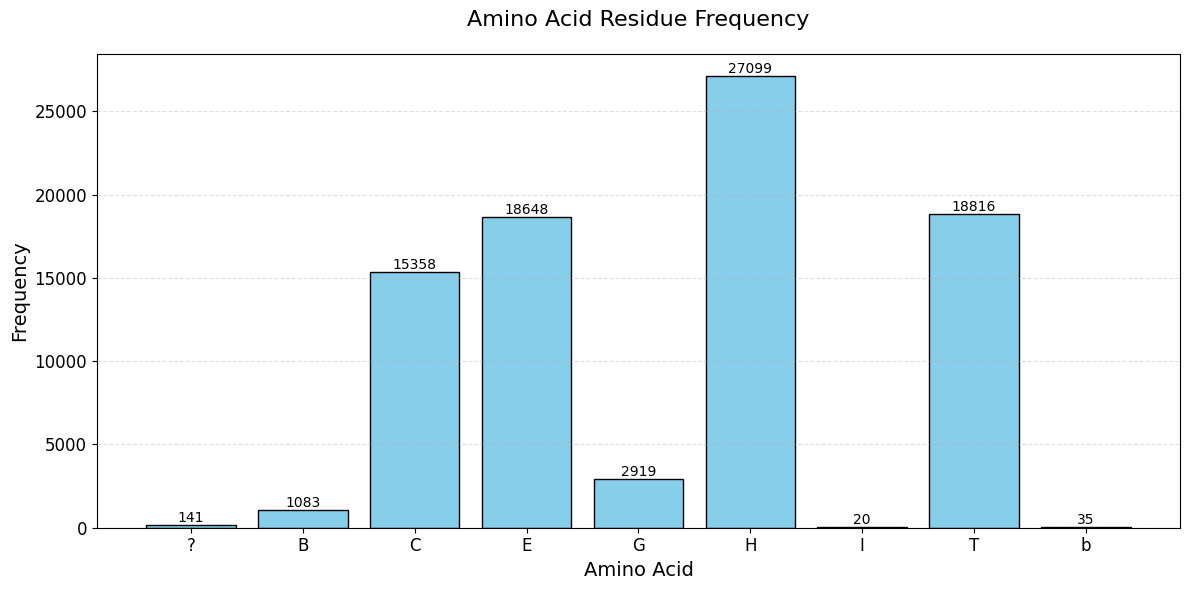

In [74]:
plt.figure(figsize=(12, 6))
bars = plt.bar(strides, count_strides, color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title('Amino Acid Residue Frequency', fontsize=16, pad=20)
plt.xlabel('Amino Acid', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()